# **Customer Churn Prediction**

In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install uniplot
!pip install imbalanced-learn

## **Importing the required Libraries**

In [ ]:
import pandas as pd
import uniplot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline



## **Load the Dataset**

In [ ]:
telco= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Customer Churn Prediction/Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
#top 5 data

telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#shape of the dataset

telco.shape

(7043, 21)

In [ ]:
#checking columns type

telco.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
#Data types of the columns

telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#Describe the data

telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


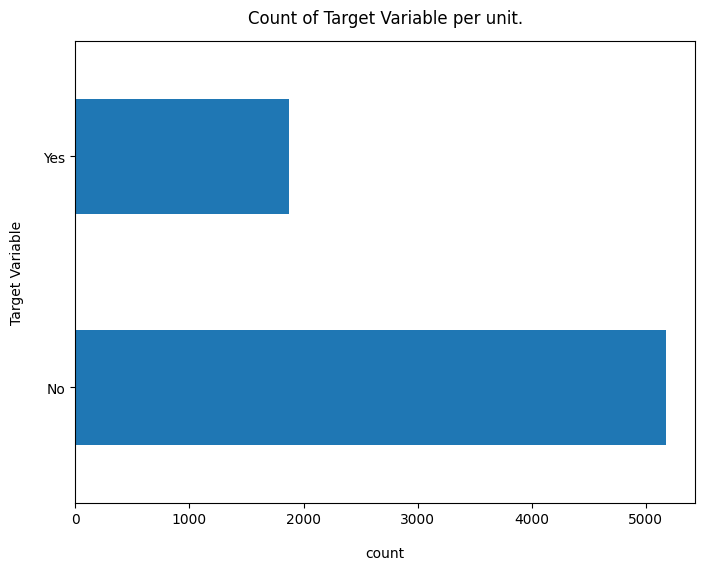

In [ ]:
telco['Churn'].value_counts().plot(kind= "barh", figsize=(8,6))
plt.xlabel("count", labelpad=14 )
plt.ylabel('Target Variable', labelpad=14)
plt.title("Count of Target Variable per unit.", y= 1.02);

In [ ]:
telco_percentage =100* telco['Churn'].value_counts(normalize= True)
telco_percentage

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [ ]:
telco['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
telco.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## **Finding Missing Values**

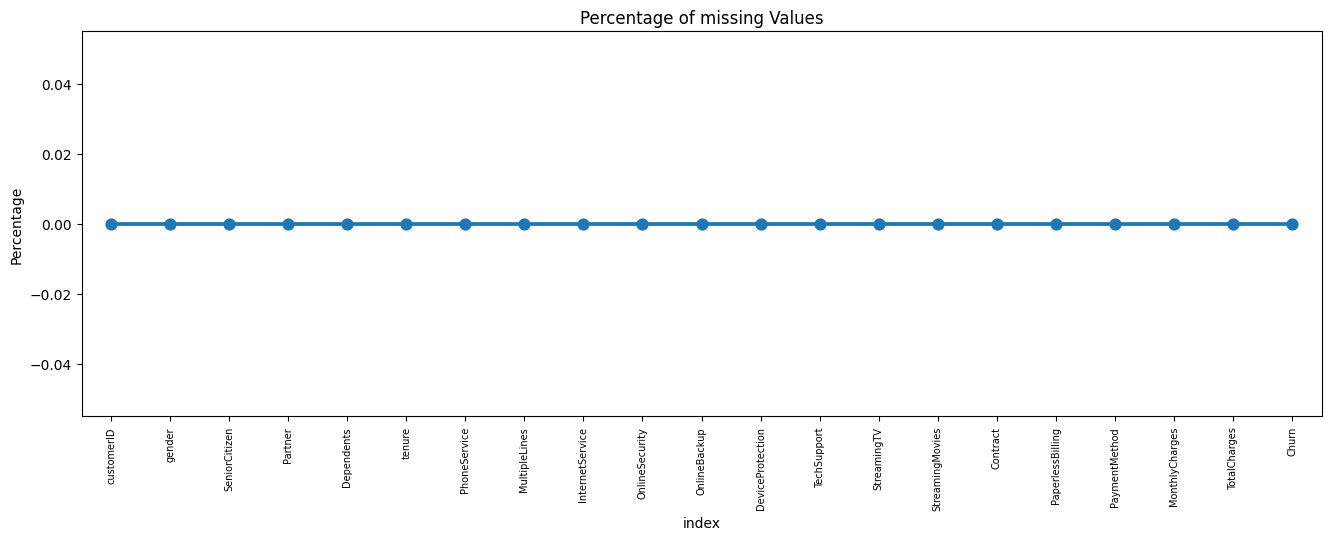

In [ ]:
missing = pd.DataFrame((telco.isnull().sum())*100/telco.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax= sns.pointplot(x='index',y=0, data=missing)
plt.xticks(rotation = 90, fontsize=7)
plt.title("Percentage of missing Values")
plt.ylabel("Percentage")
plt.show()

## **Data Cleaning**

In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
telcod= telco.copy()

In [ ]:
telcod.TotalCharges= pd.to_numeric(telcod.TotalCharges, errors='coerce')
telcod.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
telcod.loc[telcod['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
#Removing missing value

telcod.dropna(how='any', inplace= True)

#telcod.fillna(0)

In [ ]:
#Get the max tenure
print(telcod['tenure'].max())

72


In [ ]:
#Group the tenure in the bins of 12 months

labels=["{0}-{1}".format(i, i+11) for i in range(1, 72, 12)]
telcod['tenure_group']= pd.cut(telcod.tenure, (1, 13, 25, 37, 49, 61, 73), right= False, labels=labels)
# telcod['tenure_group']= pd.cut(telcod.tenure, (1:80:12), right= False, labels=labels)

telcod['tenure_group'].value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

### Remove Coloumns Not Required for processing

In [ ]:
telcod.drop(columns=['customerID', 'tenure'], axis=1, inplace= True )

telcod.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


## **Data Exploration**

### Univeriate Analysis

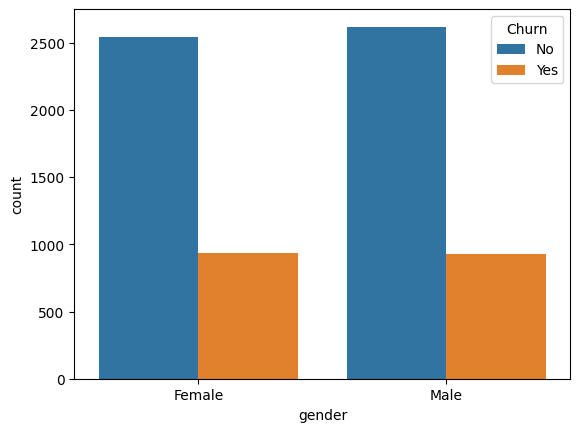

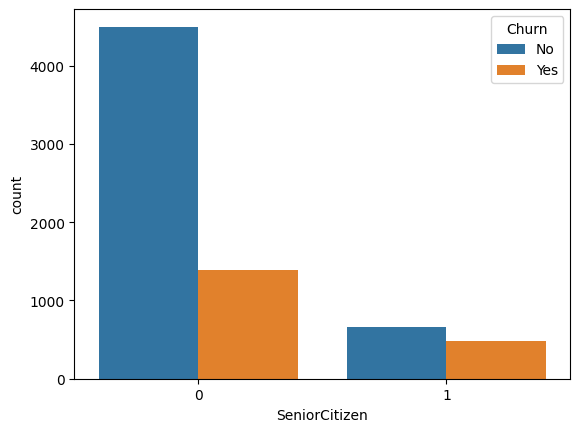

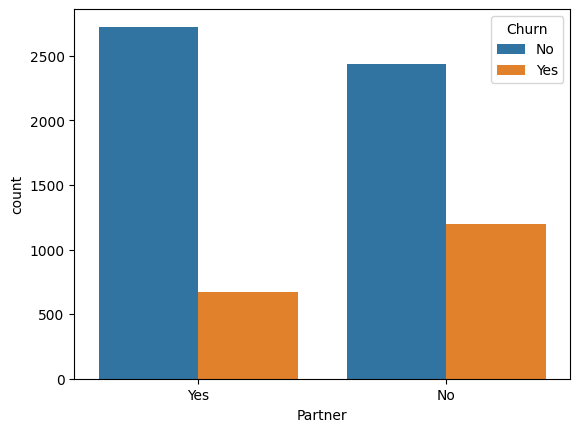

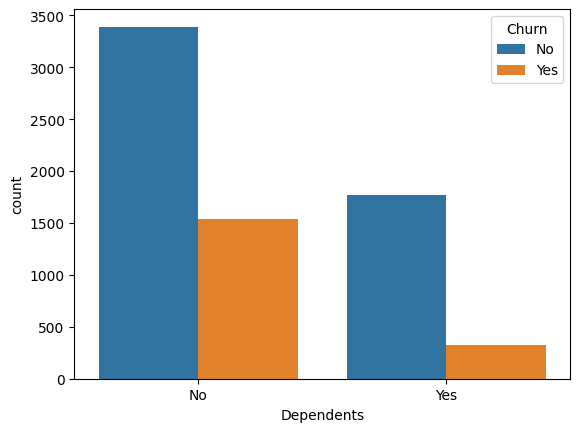

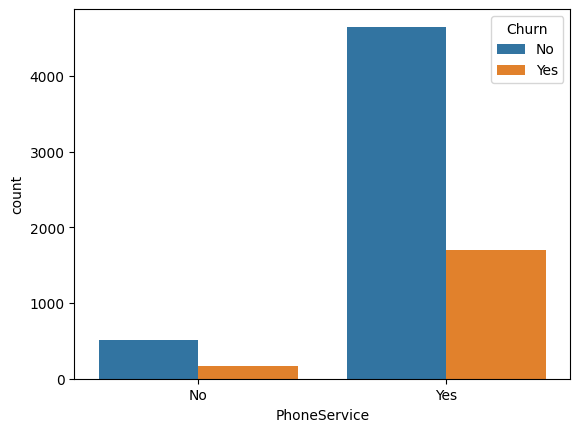

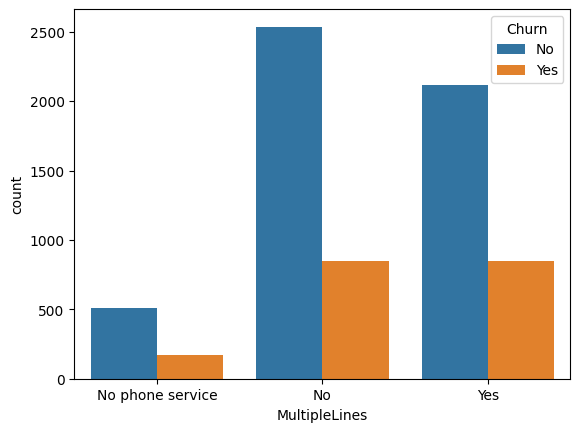

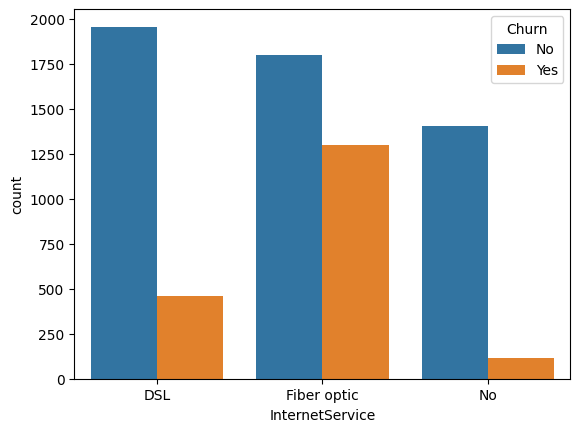

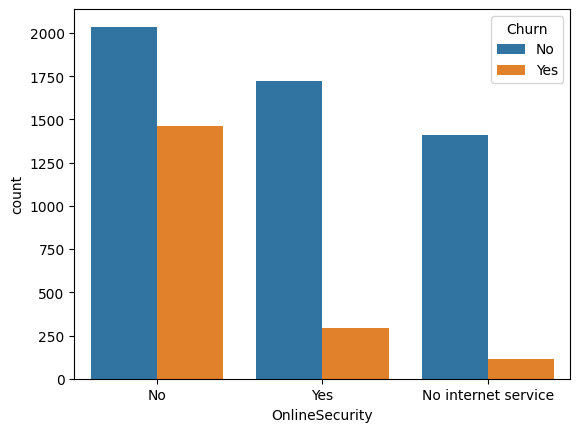

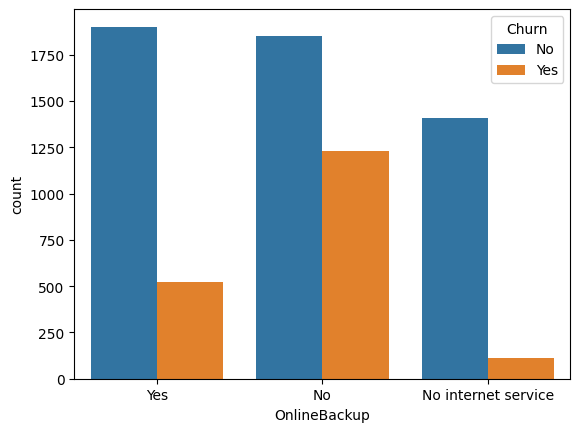

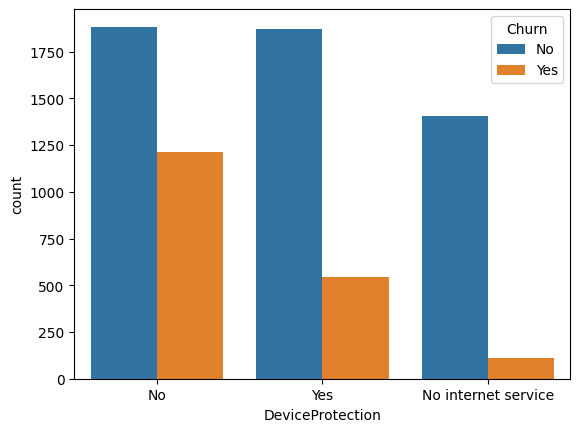

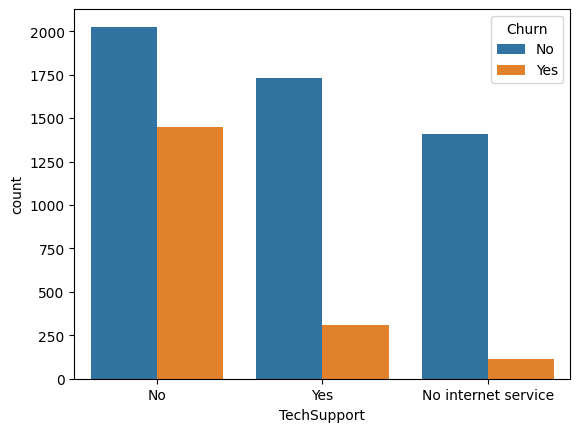

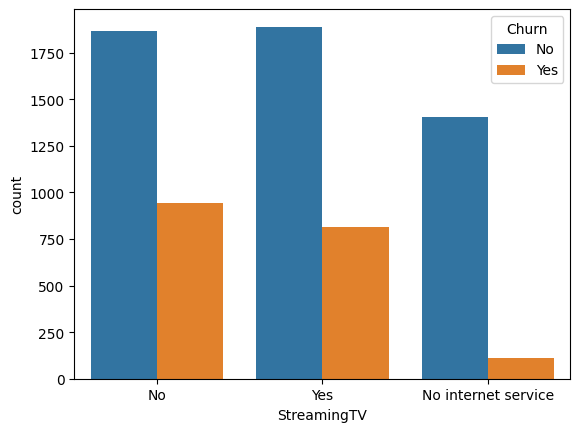

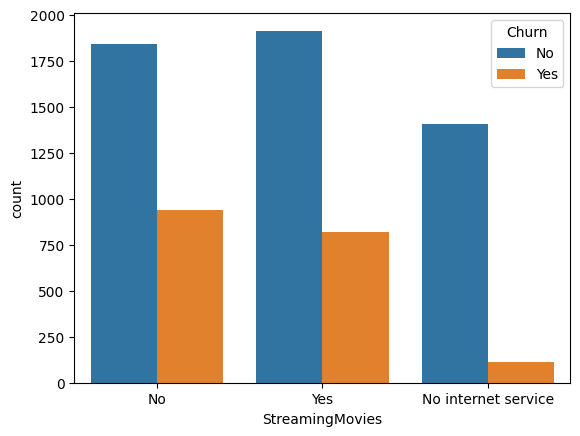

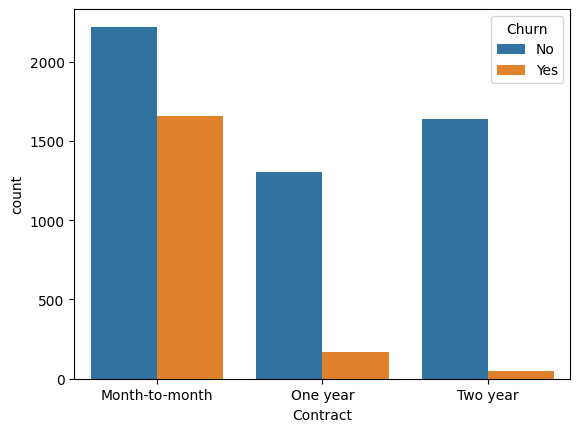

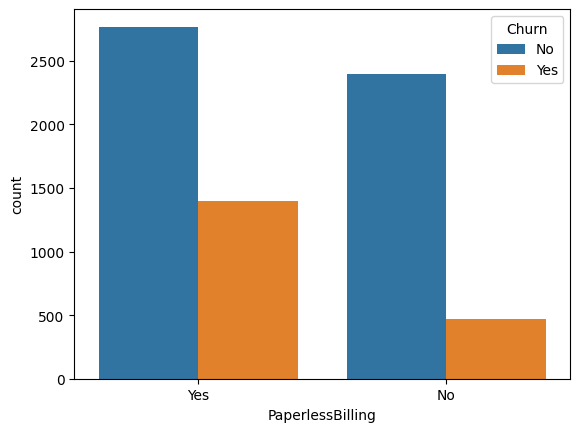

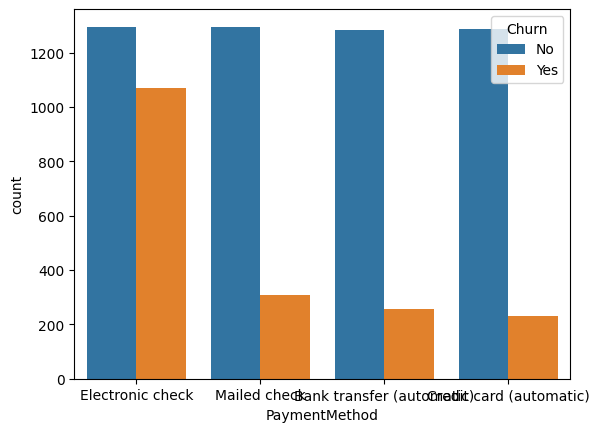

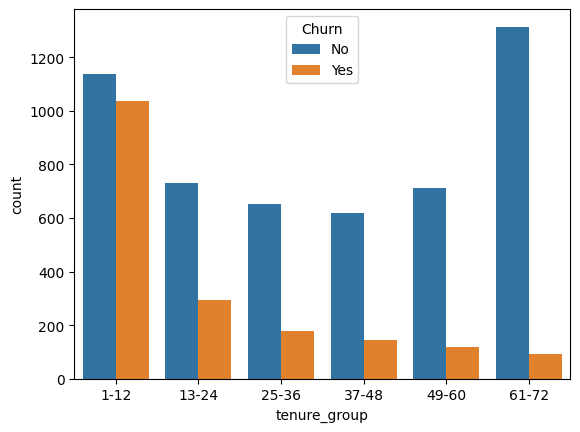

In [ ]:
for i, predicator in enumerate(telcod.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
  plt.figure(i)
  sns.countplot(data=telcod, x=predicator, hue= 'Churn')

### **Convert the target variable 'Churn' in a binary numeric variable. i.e Yes=1, No= 0.**

In [ ]:
telcod['Churn']= np.where(telcod.Churn== 'Yes',1,0)

In [ ]:
telcod.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


### **Create all the categorical Variables into dummy Variables**

In [ ]:
# prompt: create dummy variables

telcod1= pd.get_dummies(telcod)
telcod1.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


### **Relationship Between Monthly Charges and Total Charges**

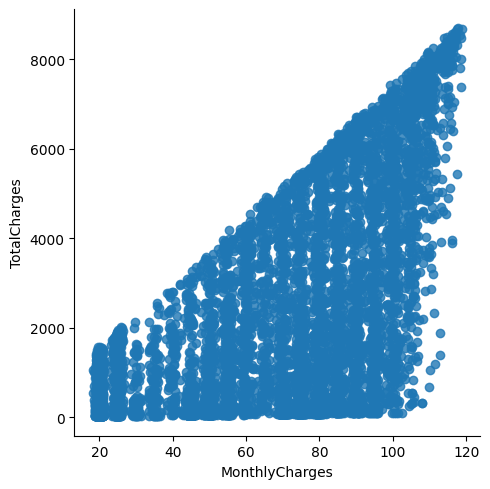

In [ ]:
sns.lmplot(data=telcod1, x= 'MonthlyCharges', y='TotalCharges', fit_reg= False)

### **Churn by Monthly Charge and Total Charge**

<ipython-input-28-55c3a1ceb3dc>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth= sns.kdeplot(telcod1.MonthlyCharges[(telcod1['Churn']==0) ], color='Red', shade= True)
<ipython-input-28-55c3a1ceb3dc>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth= sns.kdeplot(telcod1.MonthlyCharges[(telcod1['Churn']==1) ],ax=mth, color='Blue', shade= True)


Text(0.5, 1.0, 'Monthly Charges by Churn')

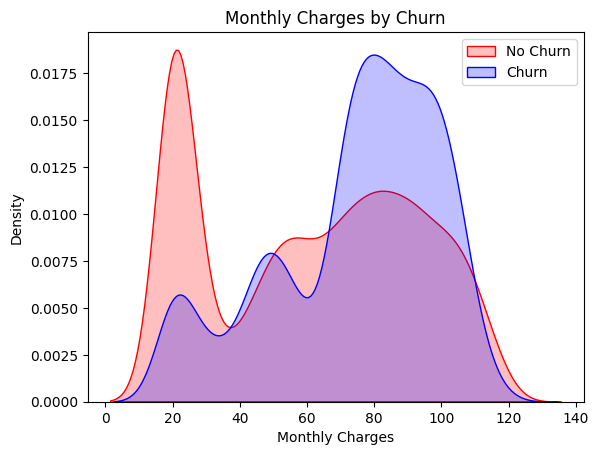

In [ ]:
mth= sns.kdeplot(telcod1.MonthlyCharges[(telcod1['Churn']==0) ], color='Red', shade= True)
mth= sns.kdeplot(telcod1.MonthlyCharges[(telcod1['Churn']==1) ],ax=mth, color='Blue', shade= True)
mth.legend(['No Churn', 'Churn'], loc= 'upper right')
mth.set_ylabel('Density')
mth.set_xlabel('Monthly Charges')
mth.set_title('Monthly Charges by Churn')

<ipython-input-29-e7f0a65a8a39>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot= sns.kdeplot(telcod1.TotalCharges[(telcod1['Churn']==0) ], color='Red', shade= True)
<ipython-input-29-e7f0a65a8a39>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot= sns.kdeplot(telcod1.TotalCharges[(telcod1['Churn']==1) ],ax=Tot, color='Blue', shade= True)


Text(0.5, 1.0, 'Total Charges by Churn')

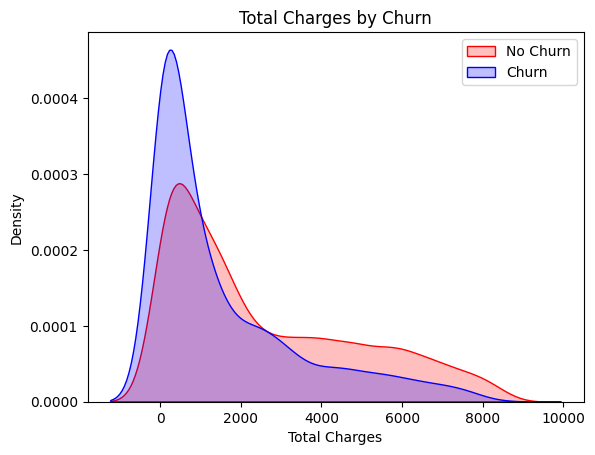

In [ ]:
Tot= sns.kdeplot(telcod1.TotalCharges[(telcod1['Churn']==0) ], color='Red', shade= True)
Tot= sns.kdeplot(telcod1.TotalCharges[(telcod1['Churn']==1) ],ax=Tot, color='Blue', shade= True)
Tot.legend(['No Churn', 'Churn'], loc= 'upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total Charges by Churn')

## **Build a Correlation of all Predicators with 'Churn'**

<Axes: >

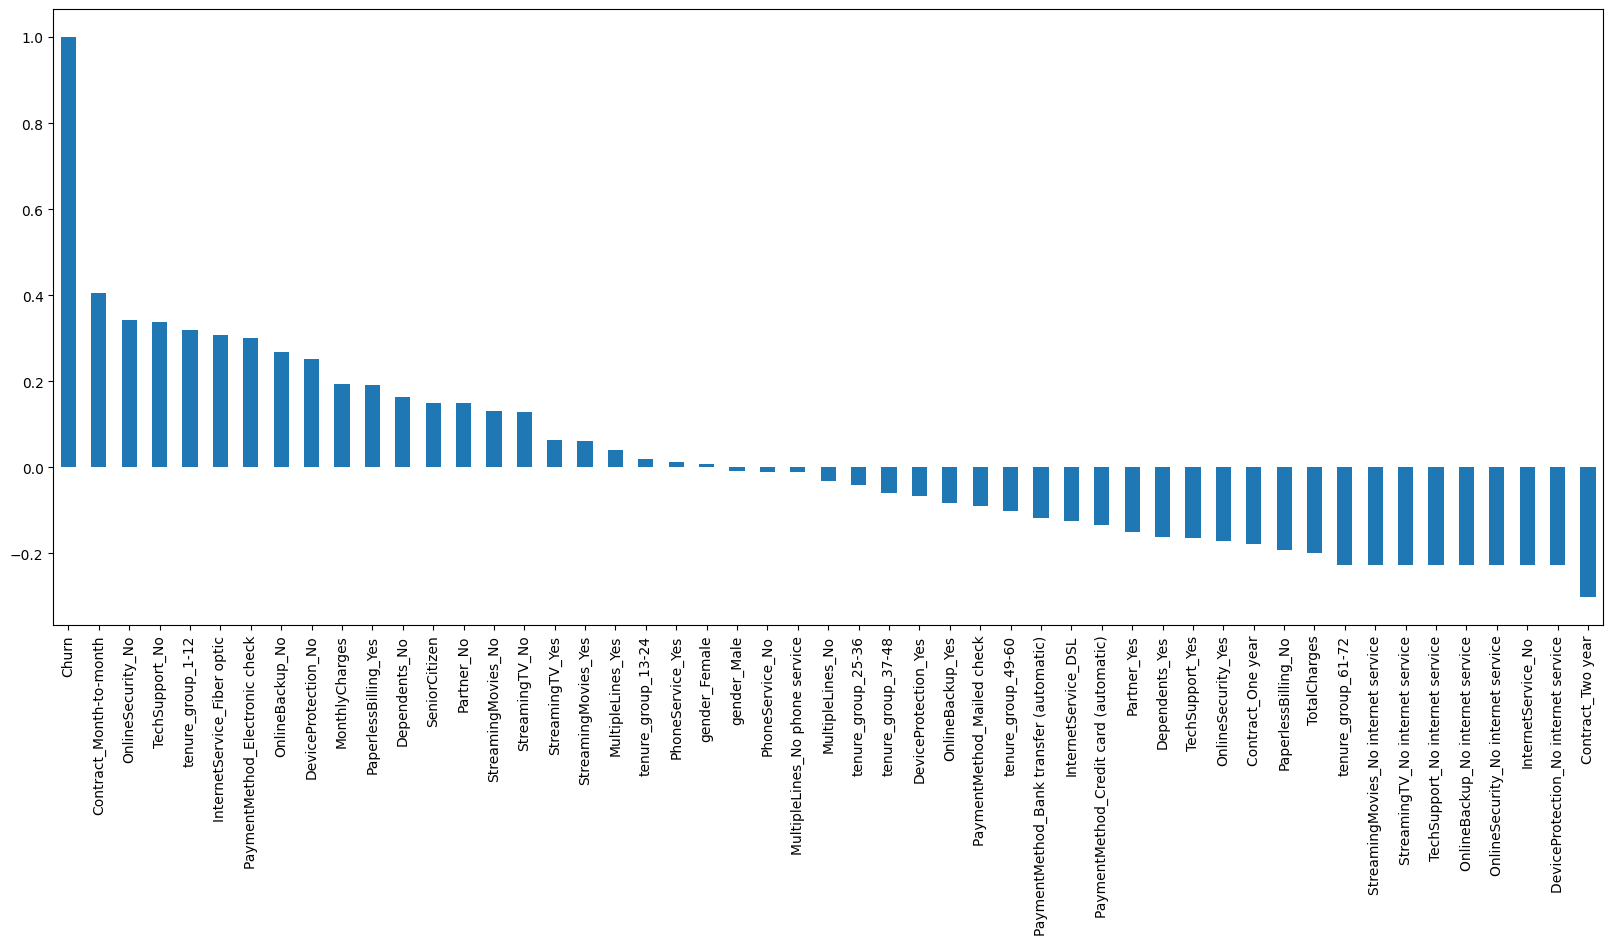

In [ ]:
plt.figure(figsize=(20, 8))
telcod1.corr()['Churn'].sort_values(ascending= False).plot(kind='bar')

<Axes: >

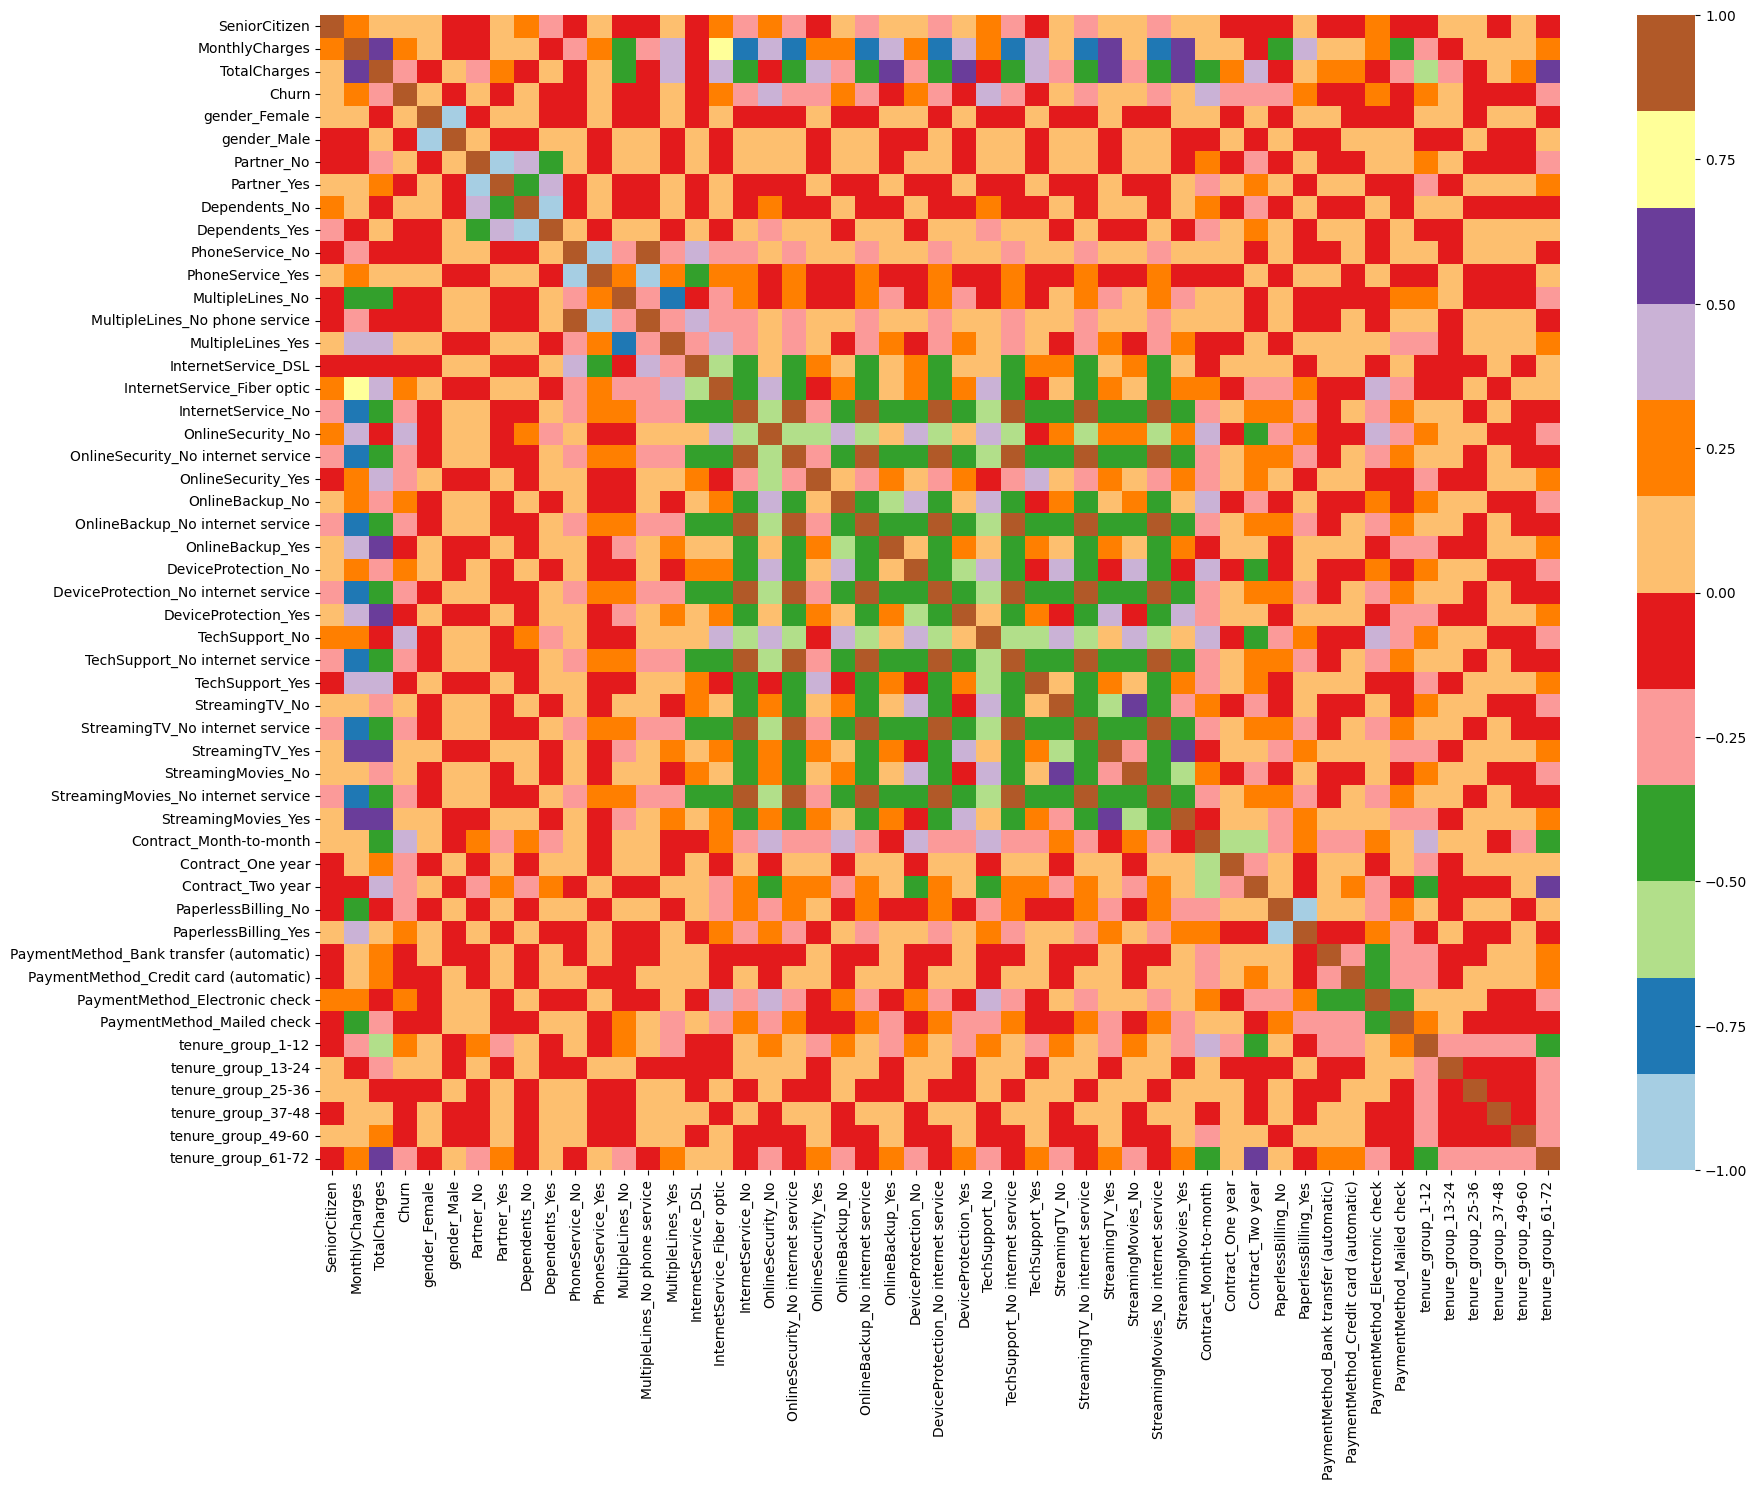

In [ ]:
# prompt: create correlation function using heatmap for telcod1

plt.figure(figsize=(20,15))
sns.heatmap(telcod1.corr(), cmap='Paired')


### **Bivariate Analysis**

In [ ]:
telcod2= telcod.loc[telcod['Churn']==0]
telcod3=telcod.loc[telcod['Churn']==1]

In [ ]:
def uniplot(df, col: str, title: str, hue: str = None):
  sns.set_style("whitegrid")
  sns.set_context('talk')
  plt.rcParams['axes.labelsize']= 20
  plt.rcParams['axes.titlesize']=22
  plt.rcParams['axes.titlepad']=30


  temp = pd.Series(data=hue)
  fig, ax= plt.subplots()
  width= len(df[col].unique())+7+4*len(temp.unique())
  fig.set_size_inches(width, 8)
  plt.xticks(rotation=45)
  plt.yscale('log')
  plt.title(title)
  ax=sns.countplot(data= df, x= col, order= df[col].values_counts().index, hue=hue, palette= "bright")
  plt.show

In [ ]:
# def uniplot(df, col, title, hue):

#     temp = pd.Series(data=hue)
#     fig, ax = plt.subplots()
#     width= len(df[col].unique())+7+4*len(temp.unique())
#     fig.set_size_inches(width, 8)

#     colors = ['brown', 'pink']
#     ax.set_title(title)
#     sns.countplot(x=col, data=df, order=df[col].value_counts().index, hue=temp, palette=colors)
#     plt.show()

In [ ]:
#uniplot(telcod3, col= "Partner", title= "Distribution of gender for churned Customer", hue= "gender")

## **Saving Final data**

In [ ]:
telcod1.to_csv("tel_data.csv")

## **Building Prediction Model**

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Customer Churn Prediction/Customer Churn/tel_data.csv")

In [ ]:
df

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,0,84.80,1990.50,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,7039,0,103.20,7362.90,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,7040,0,29.60,346.45,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7030,7041,1,74.40,306.60,1,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
df= df.drop("Unnamed: 0", axis=1)
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


### **Creating X and Y Variables**

In [ ]:
x= df.drop('Churn', axis=1)
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

### **Decision Tree Classifier**

In [ ]:
model_dt= DecisionTreeClassifier(criterion= 'gini', random_state= 100, max_depth=6, min_samples_leaf= 8 )

In [ ]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred= model_dt.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
print(classification_report(y_test, y_pred, labels= [0,1]))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1034
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
sm = SMOTEENN(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x, y)

In [ ]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size= 0.2)

In [ ]:
model_dt_smote= DecisionTreeClassifier(criterion= 'gini', random_state= 100, max_depth=6, min_samples_leaf= 8 )

In [ ]:
model_dt_smote.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred_smote = model_dt_smote.predict(xr_test)

In [ ]:
print(classification_report(yr_test, y_pred_smote, labels= [0,1]))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       524
           1       0.92      0.96      0.94       658

    accuracy                           0.93      1182
   macro avg       0.93      0.93      0.93      1182
weighted avg       0.93      0.93      0.93      1182



In [ ]:
# prompt: print confusio matrix

print(confusion_matrix(yr_test, y_pred_smote))


[[466  58]
 [ 25 633]]


### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf= RandomForestClassifier(n_estimators=100, criterion= 'gini', random_state= 100, max_depth=6, min_samples_leaf= 8 )
model_rf.fit(x_train, y_train)
y_pred_rf= model_rf.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_rf, labels= [0,1]))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1034
           1       0.69      0.45      0.55       373

    accuracy                           0.80      1407
   macro avg       0.76      0.69      0.71      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
sm = SMOTEENN(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x, y)

In [ ]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size= 0.2)

In [ ]:
model_rf_smote= RandomForestClassifier(criterion= 'gini', random_state= 100, max_depth=6, min_samples_leaf= 8 )

In [ ]:
model_rf_smote.fit(xr_train, yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred_smote_rf = model_rf_smote.predict(xr_test)

In [ ]:
print(classification_report(yr_test, y_pred_smote_rf, labels= [0,1]))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       515
           1       0.95      0.95      0.95       667

    accuracy                           0.94      1182
   macro avg       0.94      0.94      0.94      1182
weighted avg       0.94      0.94      0.94      1182



In [ ]:
print(confusion_matrix(yr_test, y_pred_smote_rf))

[[479  36]
 [ 33 634]]


## **Saving Model**



In [ ]:
import pickle

In [ ]:
filename= 'churn_model.sav'

In [ ]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [ ]:
load_model= pickle.load(open(filename,'rb'))

In [ ]:
load_model.score(xr_test, yr_test)

0.9416243654822335

In [ ]:
# prompt: deploy my model using flask

!pip install flask
!pip install flask-ngrok
from flask_ngrok import run_with_ngrok
from flask import Flask, request, jsonify
import pickle
import numpy as np

app = Flask(__name__)
run_with_ngrok(app)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict([np.array(list(data.values()))])
    output = prediction[0]
    return jsonify(output)

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll